In [10]:
import lightgbm as lgb
import yaml
import shap
import os
import pickle
import pandas

In [11]:
with open("../params.yaml", 'r') as fd:
    params = yaml.safe_load(fd)
    
pickledir = params['prepare-step2']['pickle-dir']
modeldir = params['training']['model-dir']
metricsdir = params['create-metrics']['metrics-dir']
metricsdir2 = params['create-metrics']['metrics-dir2']

models = os.listdir('../' + modeldir)
model = models[0]

with open(pickledir, 'rb') as fd:
    each_faction_dataset = pickle.load(fd)

# load model
# modelfile = modeldir + model
faction = 'swarmlings'
modelfile = 'D://PycharmProjects/TerraBot/data/faction-picker-bot/models/swarmlings_model.txt'
faction = model.split('_')[0]
bst = lgb.Booster(model_file=modelfile)  # init model

Xdata = each_faction_dataset[faction]['features']
Xdata = Xdata.drop(['Unnamed: 0', 'game'], axis=1)

In [12]:
models = os.listdir('../' + modeldir)
model = models[0]
print(model)

alchemists_model.txt


In [13]:
bst.params["objective"] = "regression"

In [14]:
Xsmall = Xdata.iloc[:100, :]
print(Xsmall.shape)

ypred = bst.predict(Xsmall)

(100, 71)


In [15]:
print(Xsmall.columns)

Index(['r1_SCORE1', 'r1_SCORE2', 'r1_SCORE3', 'r1_SCORE4', 'r1_SCORE5',
       'r1_SCORE6', 'r1_SCORE7', 'r1_SCORE8', 'r1_SCORE9', 'r2_SCORE1',
       'r2_SCORE2', 'r2_SCORE3', 'r2_SCORE4', 'r2_SCORE5', 'r2_SCORE6',
       'r2_SCORE7', 'r2_SCORE8', 'r2_SCORE9', 'r3_SCORE1', 'r3_SCORE2',
       'r3_SCORE3', 'r3_SCORE4', 'r3_SCORE5', 'r3_SCORE6', 'r3_SCORE7',
       'r3_SCORE8', 'r3_SCORE9', 'r4_SCORE1', 'r4_SCORE2', 'r4_SCORE3',
       'r4_SCORE4', 'r4_SCORE5', 'r4_SCORE6', 'r4_SCORE7', 'r4_SCORE8',
       'r4_SCORE9', 'r5_SCORE1', 'r5_SCORE2', 'r5_SCORE3', 'r5_SCORE4',
       'r5_SCORE5', 'r5_SCORE6', 'r5_SCORE7', 'r5_SCORE8', 'r5_SCORE9',
       'r6_SCORE1', 'r6_SCORE2', 'r6_SCORE3', 'r6_SCORE4', 'r6_SCORE5',
       'r6_SCORE6', 'r6_SCORE7', 'r6_SCORE8', 'r6_SCORE9', 'BON1', 'BON2',
       'BON3', 'BON4', 'BON5', 'BON6', 'BON7', 'BON8', 'BON9', 'BON10',
       '2players', '3players', '4players', '5players', 'map1', 'map2', 'map3'],
      dtype='object')


In [16]:
# give new columns
scoreconvertdict = {'SCORE1': 'SPADE >> 2',  
                    'SCORE2': 'TOWN >> 5',  
                    'SCORE3': 'D >> 2',  
                    'SCORE4': 'SA/SH >> 5',  
                    'SCORE5': 'D >> 2',  
                    'SCORE6': 'TP >> 3',  
                    'SCORE7': 'SA/SH >> 5',  
                    'SCORE8': 'TP >> 3',  
                    'SCORE9': 'TE >> 4'}

In [17]:
bontiledict = {'BON1': 'SPD + 2C',
               'BON2': 'cult + 4C',
               'BON3': '+6C',
               'BON4': '+3pw 1 ship',
               'BON5': '+1W + 3PW',
               'BON6': 'pass-vp:SA/SH*4 + 2W',
               'BON7': 'pass-vp:TP*2 + 1W',
               'BON8': '+1P',
               'BON9': 'pass-vp:D*1 + 2C',
               'BON10': 'pass-vp: ship*3 + 3pw'      
                }

In [18]:
Xsmall.columns[0][-6:] in scoreconvertdict.keys()
print(Xsmall.columns[0][:3])

r1_


In [19]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(bst)
shap_values = explainer(Xsmall)

In [20]:
print(type(shap_values))

<class 'shap._explanation.Explanation'>


In [21]:
dir(shap_values)
# shap_values.__doc__

['__add__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_apply_binary_operator',
 '_flatten_feature_names',
 '_numpy_func',
 '_s',
 '_use_data_as_feature_names',
 'abs',
 'argsort',
 'base_values',
 'clustering',
 'cohorts',
 'data',
 'display_data',
 'feature_names',
 'flip',
 'hclust',
 'hierarchical_values',
 'identity',
 'instance_names',
 'lower_bounds',
 'main_effects',
 'max',
 'mean',
 'min',
 'op_history',
 'output_indexes',
 'output_names',
 'percentile',
 'sample',
 'shape',
 'sum',
 'upper_bounds',
 'values']

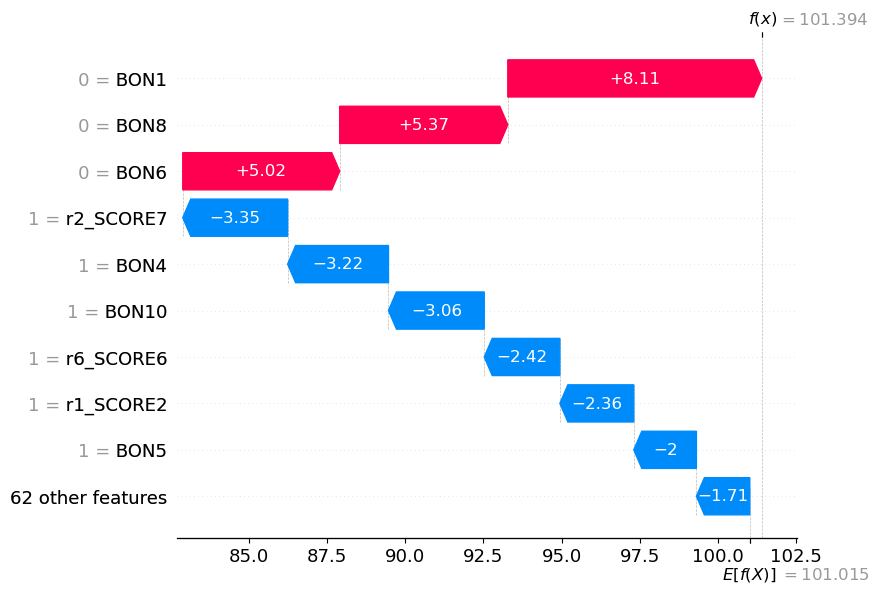

In [22]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [23]:
copycols = []
for ii, column in enumerate(Xsmall.columns):
    if column[-6:] in scoreconvertdict.keys():
        copycols.append(column[:3] + scoreconvertdict[column[-6:]])
    elif column in bontiledict.keys():
        copycols.append(bontiledict[column])
    else:
        copycols.append(column)
        
Xsmall.columns = copycols

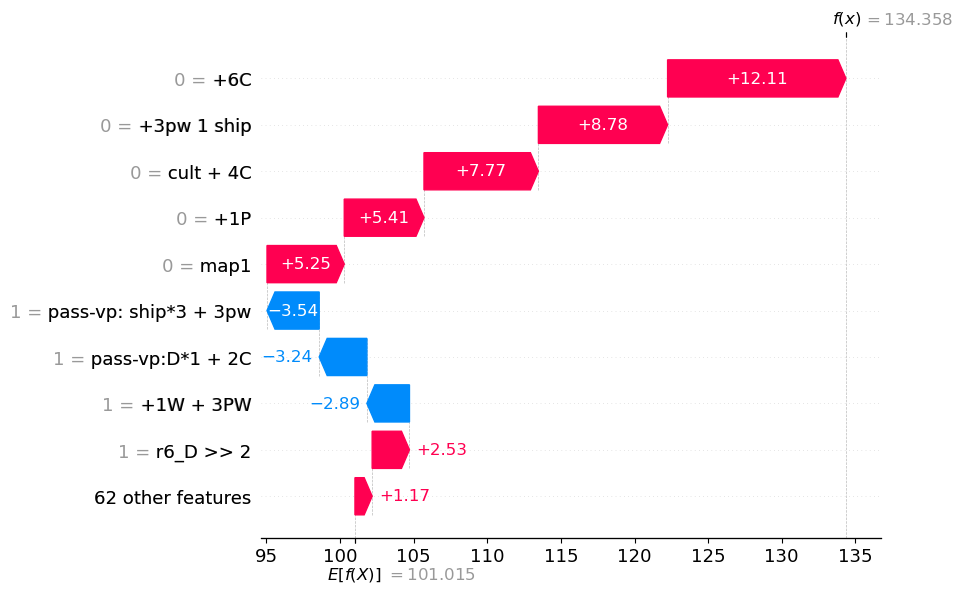

In [24]:
shap_values = explainer(Xsmall)
shap.plots.waterfall(shap_values[1])

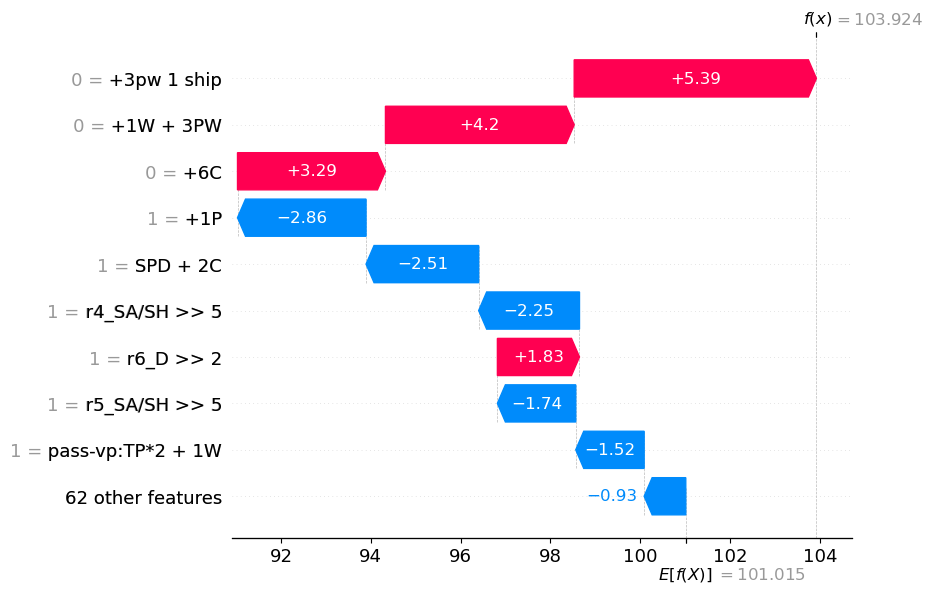

In [25]:
shap.plots.waterfall(shap_values[19])

In [26]:
shap.initjs()
shap.plots.force(shap_values[18])